# PCA -  Principal Component Analysis

PCA is a widely used statistical technique in data analysis and dimensionality reduction. PCA aims to identify the most important features or variables in a dataset and represent them as a new set of uncorrelated variables called principal components.

The main idea behind PCA is to transform a high-dimensional dataset into a lower-dimensional space while preserving the most significant information. This is achieved by finding the directions, known as principal components, along which the data varies the most. The first principal component captures the maximum variance in the data, and subsequent components capture decreasing amounts of variance.

Here's a step-by-step overview of how PCA works:
- Standardize the data
- Compute the covariance matrix
- Calculate the eigenvectors and eigenvalues
- Select the principal components
- Create the new feature space


## Let's undnerstand with an example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Creating a sample 2D Dataset

In [2]:
df=pd.DataFrame(np.array([[1, 2], [4, 5], [7, 8], [2, 8], [6, 10], [8,3], [17, 1]]),columns=['Feature1','Feature2'])

In [3]:
df

,Feature1,Feature2
0,1,2
1,4,5
2,7,8
3,2,8
4,6,10
5,8,3
6,17,1


#### Using StandardScaler is to bring all features to a similar scale

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data =pd.DataFrame(scaler.fit_transform(df))

In [5]:
scaled_data.describe()

,0,1
count,7.000000e+00,7.000000e+00
mean,-6.344132e-17,6.344132e-17
std,1.080123e+00,1.080123e+00
min,-1.102492e+00,-1.341641e+00
25%,-6.963106e-01,-8.720665e-01
50%,-8.703883e-02,-8.944272e-02
75%,2.175971e-01,8.497058e-01
max,2.146958e+00,1.475805e+00


In [6]:
covariance=scaled_data.cov()

In [7]:
cov=np.array(covariance)

In [8]:
cov

array([[ 1.16666667, -0.45412438],
       [-0.45412438,  1.16666667]])

In [9]:
eigenValue, eigenVector=np.linalg.eig(cov)

In [10]:
eigenValue

array([1.62079105, 0.71254228])

In [11]:
eigenVector

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [12]:
print('PCA 1')
eVector1=eigenVector[:,0]
scaled_data @ eVector1

PCA 1


0   -0.052256
1   -0.285514
2   -0.518772
3   -1.236805
4   -1.105097
5    0.731632
6    2.466812
dtype: float64

In [13]:
print('PCA 2')
eVector2=eigenVector[:,1]
scaled_data @ eVector2

PCA 2


0   -1.506903
1   -0.412005
2    0.682894
3   -0.035140
4    0.982006
5   -0.280297
6    0.569445
dtype: float64

In [14]:
#Total Variation or sub of all eigenvalues
tVariation=np.sum(eigenValue)
tVariation

2.333333333333333

In [15]:
print('Total PCA 1 account for :'+ str((eigenValue[0]/tVariation)*100)+'% of variation')
explainedVarianceRatio1=(eigenValue[0]/tVariation)*100

Total PCA 1 account for :69.46247360403807% of variation


In [16]:
print('Total PCA 2 account for :'+ str((eigenValue[1]/tVariation)*100)+'% of variation')
explainedVarianceRatio2=(eigenValue[1]/tVariation)*100

Total PCA 2 account for :30.537526395961933% of variation


In [17]:
from sklearn.decomposition import PCA


In [18]:
pca=PCA(n_components=2)

In [19]:
pca.fit_transform(scaled_data)

array([[-0.05225558,  1.5069033 ],
       [-0.28551367,  0.41200478],
       [-0.51877176, -0.68289375],
       [-1.23680546,  0.03513995],
       [-1.10509737, -0.98200588],
       [ 0.73163216,  0.28029669],
       [ 2.46681169, -0.56944509]])

In [20]:
pca.explained_variance_ratio_

array([0.69462474, 0.30537526])

In [21]:
#it is similar to calculated above manually
print(explainedVarianceRatio1,explainedVarianceRatio2)

69.46247360403807 30.537526395961933


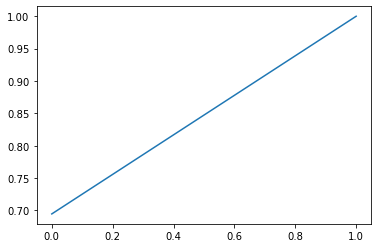

In [22]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### Load another dataset

In [23]:
df=pd.read_csv(r'wine dataset/wine.data',names=['WineType','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                   'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity',
                   'Hue','OD280/OD315 of diluted wines','Proline'])

In [24]:
df.head()

,WineType,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
df=df.iloc[:,1:]

In [26]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data =pd.DataFrame(scaler.fit_transform(df))

In [28]:
from sklearn.decomposition import PCA
pca=PCA()

In [29]:
pca.fit_transform(scaled_data)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [30]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

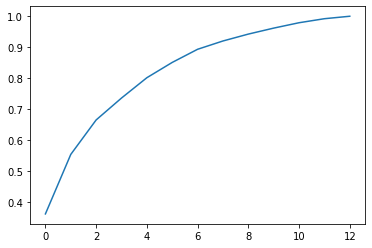

In [31]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))